In [1]:
import pylab as plt
import numpy as np
import swot_ssh_utils as swot
import swot_swell_utils as swell
from cartopy import crs as ccrs
from netCDF4 import Dataset
import xarray as xr
import sys as sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import datetime
from numpy.ma import masked_array

from wave_physics_functions import wavespec_Efth_to_Ekxky,wavespec_Efth_to_first3

from matplotlib.pyplot import cm
import pickle
from  lib_filters_obp import *
from scipy import signal
import cmocean
import cmocean.cm as cmo
import glob as glob
lightcmap = cmocean.tools.lighten(cmo.ice, 1)

#PATH_with_functions = '/home/ardhuin/TOOLS/OPTOOLS/PYTHON/'
#sys.path.append(PATH_with_functions)
from  spectral_analysis_functions import *
plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})


In [2]:
# This opens the WAVEWATCH III spectra file (computed for B. Molero).
# On datarmor, this is here: 
# filetr='/home/datawork-WW3/PROJECT/SWOT/GLOBAL_REF102040/TRACK_NC/GLOB-30M/SWOT_WW3-GLOB-30M_202306_trck.nc'
filetr='/media/ardhuin/FabLinux/WW3-SWOT/GLOBAL_REF102040/SWOT_WW3-GLOB-30M_202306_trck.nc'
ds_ww3t = xr.open_dataset(filetr)
modang=np.mod(90-ds_ww3t.direction,360)
moddf=ds_ww3t.frequency2.values-ds_ww3t.frequency1.values
modf=ds_ww3t.frequency.values
modnth=np.shape(modang)[0]
moddth=(2*np.pi/modnth)

Reading file: /media/ardhuin/FabLinux/SWOT2/SWOT_L2_LR_SSH_Unsmoothed_547_008_20230609T163637_20230609T172653_PGC0_02.nc ## 20230609T16
<xarray.Dataset>
Dimensions:                                (num_lines: 81054, num_pixels: 240)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 ...
    longitude                              (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                                   (num_lines) datetime64[ns] ...
    time_tai                               (num_lines) datetime64[ns] ...
    latitude_uncert                        (num_lines, num_pixels) float32 ...
    longitude_uncert                       (num_lines, num_pixels) float32 ...
    polarization_karin                     (num_lines) object ...
    ssh_karin_2                            (num_lines, num_pixels) float64 ...
    ...                                     ...
    sig0_karin_uncer

/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)


latc: -9.0 -9.0 -9.4 0 44043
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240
track vector: 44194 -0.4678979999999999 0.0700975720630535 -8.520330971236973 171.47966902876303 ## -0.4678979999999999 1 44043
nxtile: 20 21 250 235


/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Nb of points OBP kernel: 39
Nb of points OBP kernel: 41
Nb of points OBP kernel: 241
Hs1,Hs2: 1.896208460402825 1.844172213554811
Az cut-off: 0.45680205866926576 343.55683794871453 0.11797527225782087 0.0005421537274614552 0.5563157261433924 0.24550892794898516 (40, 42)
sum of coarsened model spectrum at  114.0 -9.0  : 0.1243470132036673 1.410514874525851 max med: 45.099895 36.941704
Swell mask option: 3 1 0 0.3 0.24672719099250967 28 36.941704


/tmp/ipykernel_4473/2301490027.py:344: RuntimeWarning: divide by zero encountered in log10
  im=ax[1].pcolormesh(-kxm[ix1:ix1+nxtile*6]*1000,-kym[iy1:iy1+nxtile*6]*1000,10*np.log10(Ekxky[ix1:ix1+nxtile*6,iy1:iy1+nxtile*6]).T,cmap='viridis',rasterized=True,vmin=-10+dBE2, vmax=30+dBE2)


/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/spectral_analysis_functions.py:557: RuntimeWarning: All-NaN slice encountered
  max1=np.nanmax(array1)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.05S
latc: -9.05 -9.0 -9.4 1 44067
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.10S
latc: -9.100000000000001 -9.0 -9.4 2 44090
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.15S
latc: -9.150000000000002 -9.0 -9.4 3 44114
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.20S
latc: -9.200000000000003 -9.0 -9.4 4 44137
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240
track vector: 44288 -0.46784099999999995 0.07038329396097283 -8.555574371096355 171.44442562890364 ## -0.46784099999999995 1 44137
nxtile: 20 21 250 235


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Nb of points OBP kernel: 39
Nb of points OBP kernel: 41
Nb of points OBP kernel: 241
Hs1,Hs2: 1.896208460402825 1.8435376137415307
Az cut-off: 0.45680205866926576 343.55683794871453 0.11797527225782087 0.0005421537274614552 0.5563157261433924 0.24550892794898516 (40, 42)
sum of coarsened model spectrum at  114.0 -9.0  : 0.12427957214617155 1.4101323180250656 max med: 45.099895 34.85073
Swell mask option: 3 1 0 0.3 0.26362901322053006 18 34.85073


/tmp/ipykernel_4473/2301490027.py:344: RuntimeWarning: divide by zero encountered in log10
  im=ax[1].pcolormesh(-kxm[ix1:ix1+nxtile*6]*1000,-kym[iy1:iy1+nxtile*6]*1000,10*np.log10(Ekxky[ix1:ix1+nxtile*6,iy1:iy1+nxtile*6]).T,cmap='viridis',rasterized=True,vmin=-10+dBE2, vmax=30+dBE2)


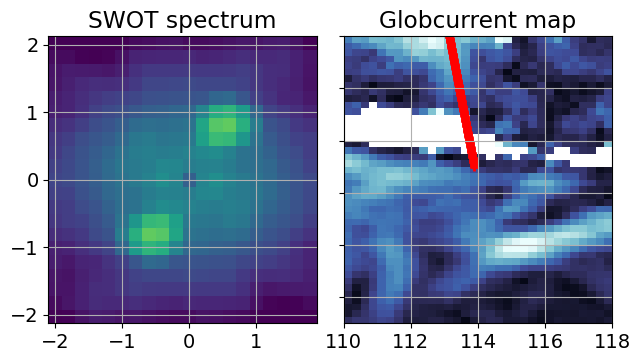

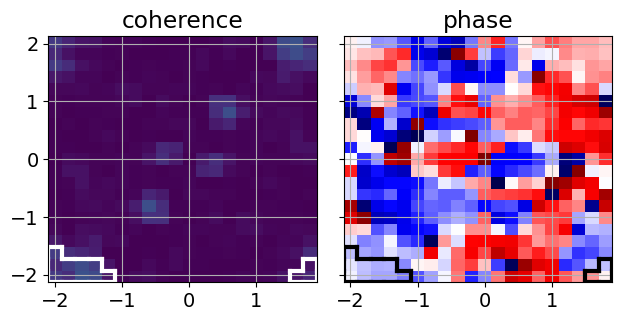

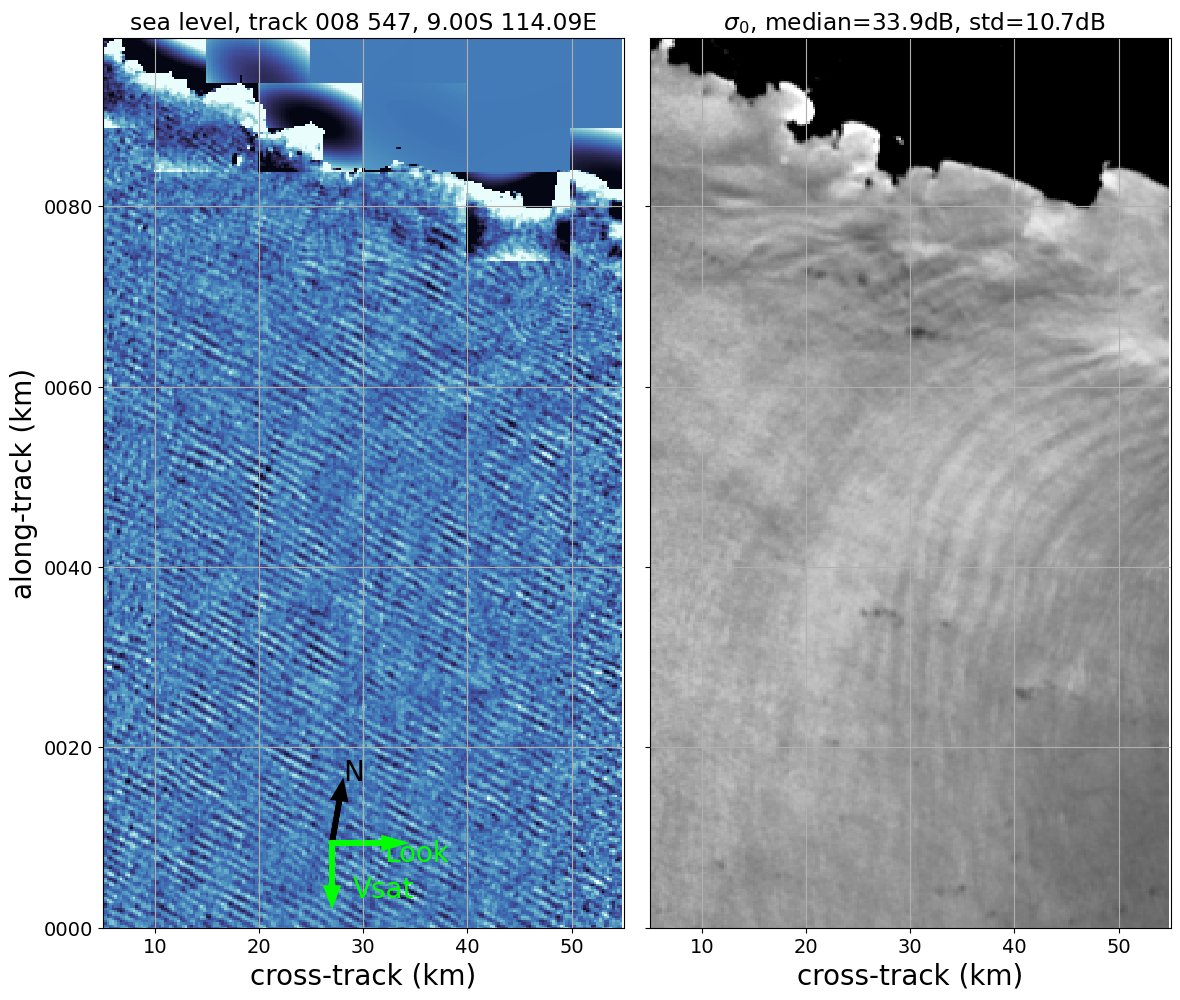

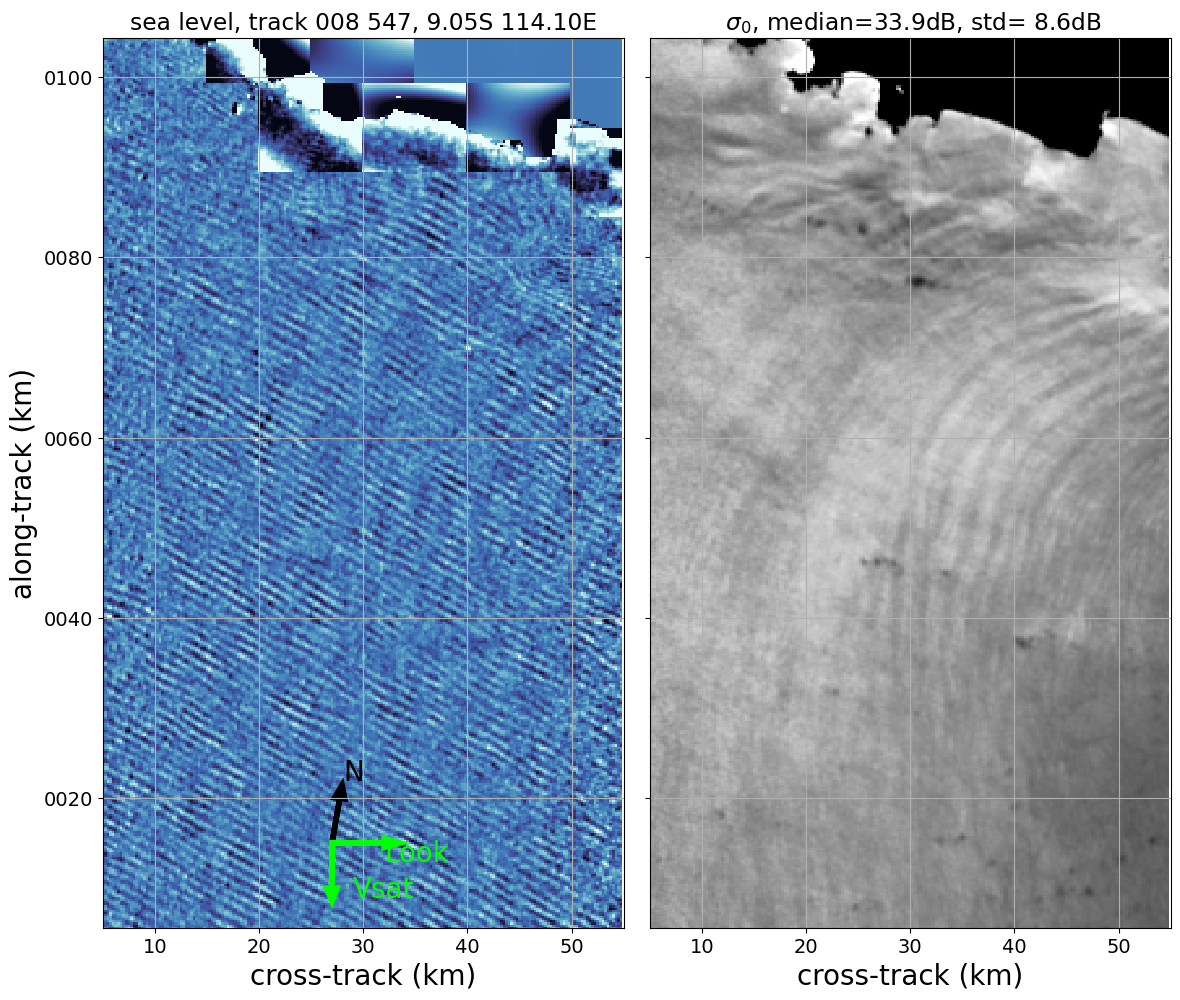

/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.25S
latc: -9.250000000000004 -9.0 -9.4 5 44161
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.30S
latc: -9.300000000000004 -9.0 -9.4 6 44184
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.35S
latc: -9.350000000000005 -9.0 -9.4 7 44208
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


group: left , lonlat: 09.40S
latc: -9.400000000000006 -9.0 -9.4 8 44231
number of lines (alongtrack): 470 , number of pixels (crosstrack): 240
track vector: 44382 -0.4678489999999993 0.07013571116331874 -8.525778397522515 171.47422160247748 ## -0.4678489999999993 1 44231
nxtile: 20 21 250 235


/home/ardhuin/PUBLI/2024_SWELLSWOT/CLEAN/swot_ssh_utils.py:34: RuntimeWarning: Mean of empty slice
  lat=np.nanmean(data_in['latitude'].data,axis=-1)
/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Nb of points OBP kernel: 39
Nb of points OBP kernel: 41
Nb of points OBP kernel: 241
Hs1,Hs2: 1.8801020816763363 1.8296988465277129
Az cut-off: 0.4556286717471292 342.674343894651 0.11927610333281417 0.0005421537274614552 0.5579920894485407 0.24550892794898516 (40, 42)
sum of coarsened model spectrum at  114.0 -9.5  : 0.11863882052240081 1.3777594595423444 max med: 41.113884 32.90477
Swell mask option: 3 1 0 0.3 0.3192467285592791 14 32.90477


/tmp/ipykernel_4473/2301490027.py:344: RuntimeWarning: divide by zero encountered in log10
  im=ax[1].pcolormesh(-kxm[ix1:ix1+nxtile*6]*1000,-kym[iy1:iy1+nxtile*6]*1000,10*np.log10(Ekxky[ix1:ix1+nxtile*6,iy1:iy1+nxtile*6]).T,cmap='viridis',rasterized=True,vmin=-10+dBE2, vmax=30+dBE2)


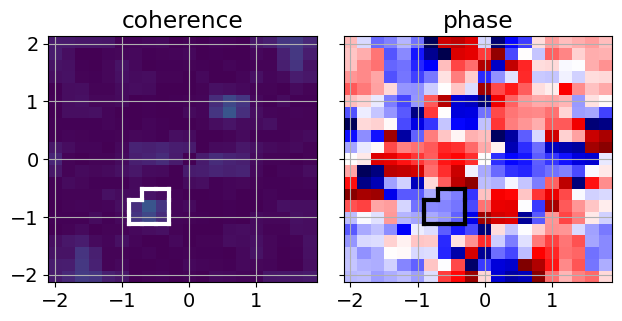

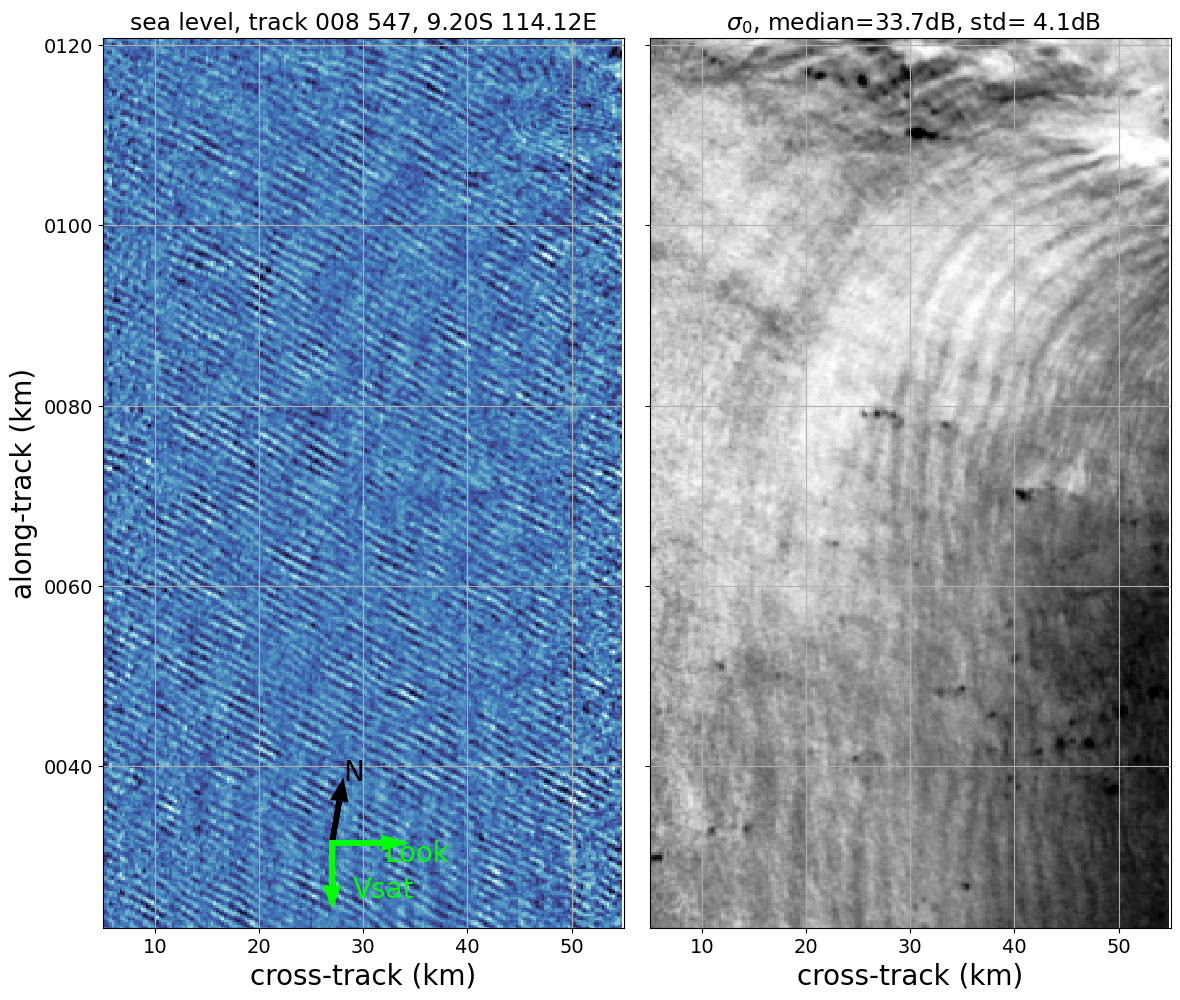

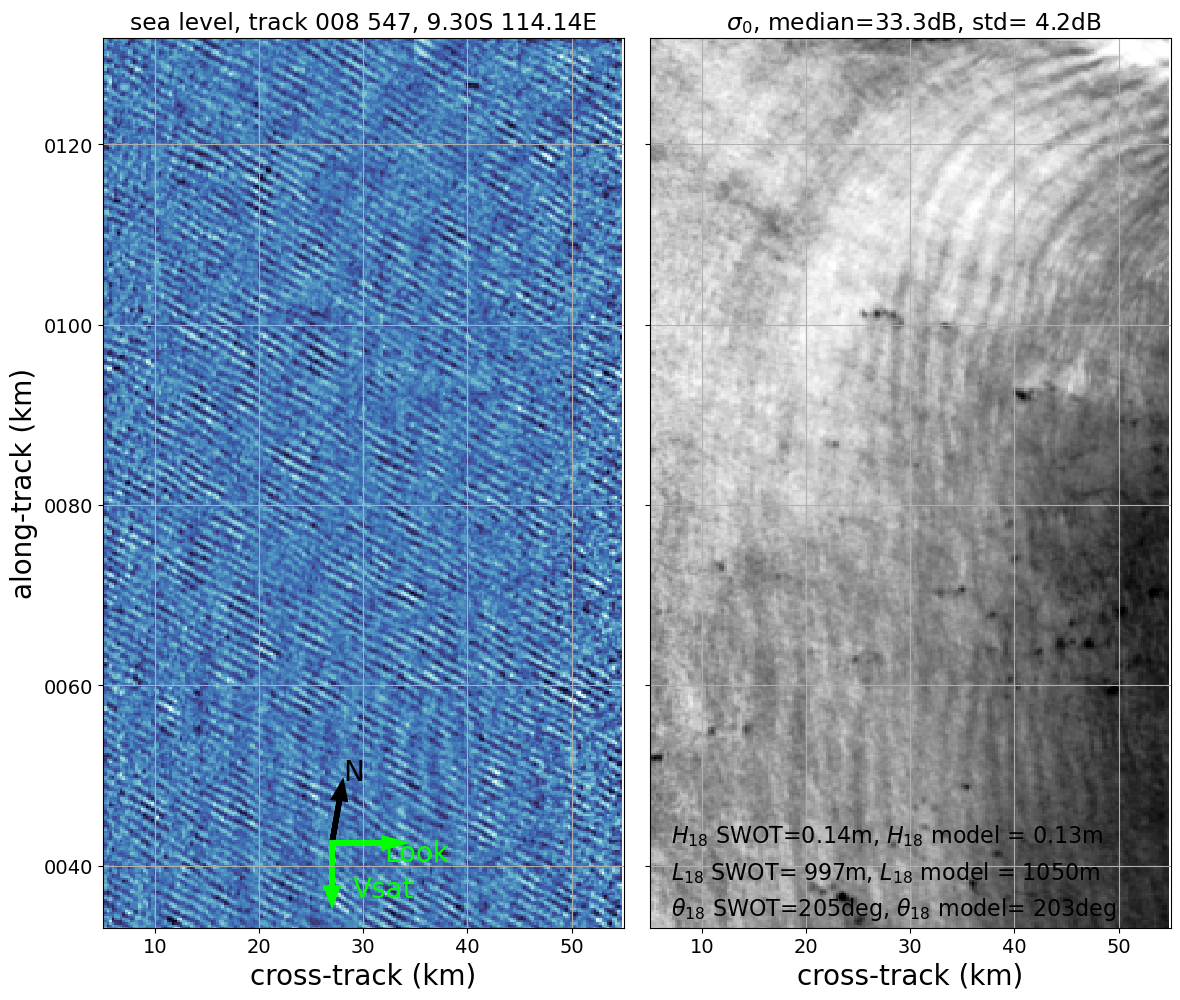

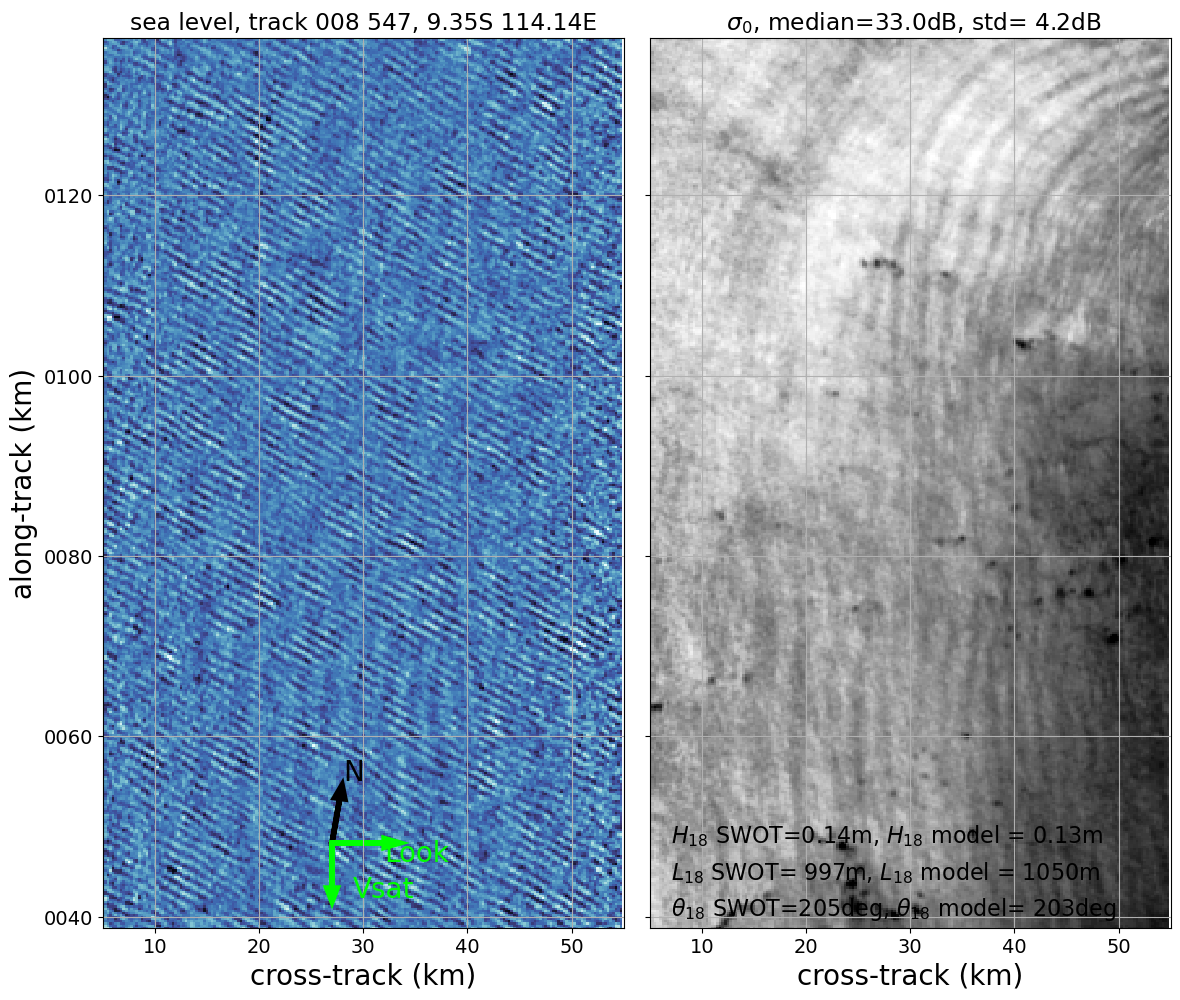

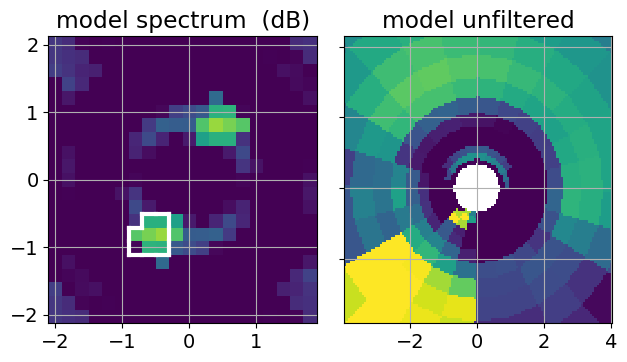

/home/ardhuin/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_4473/2301490027.py:463: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(newlabs)
/tmp/ipykernel_4473/2301490027.py:474: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))


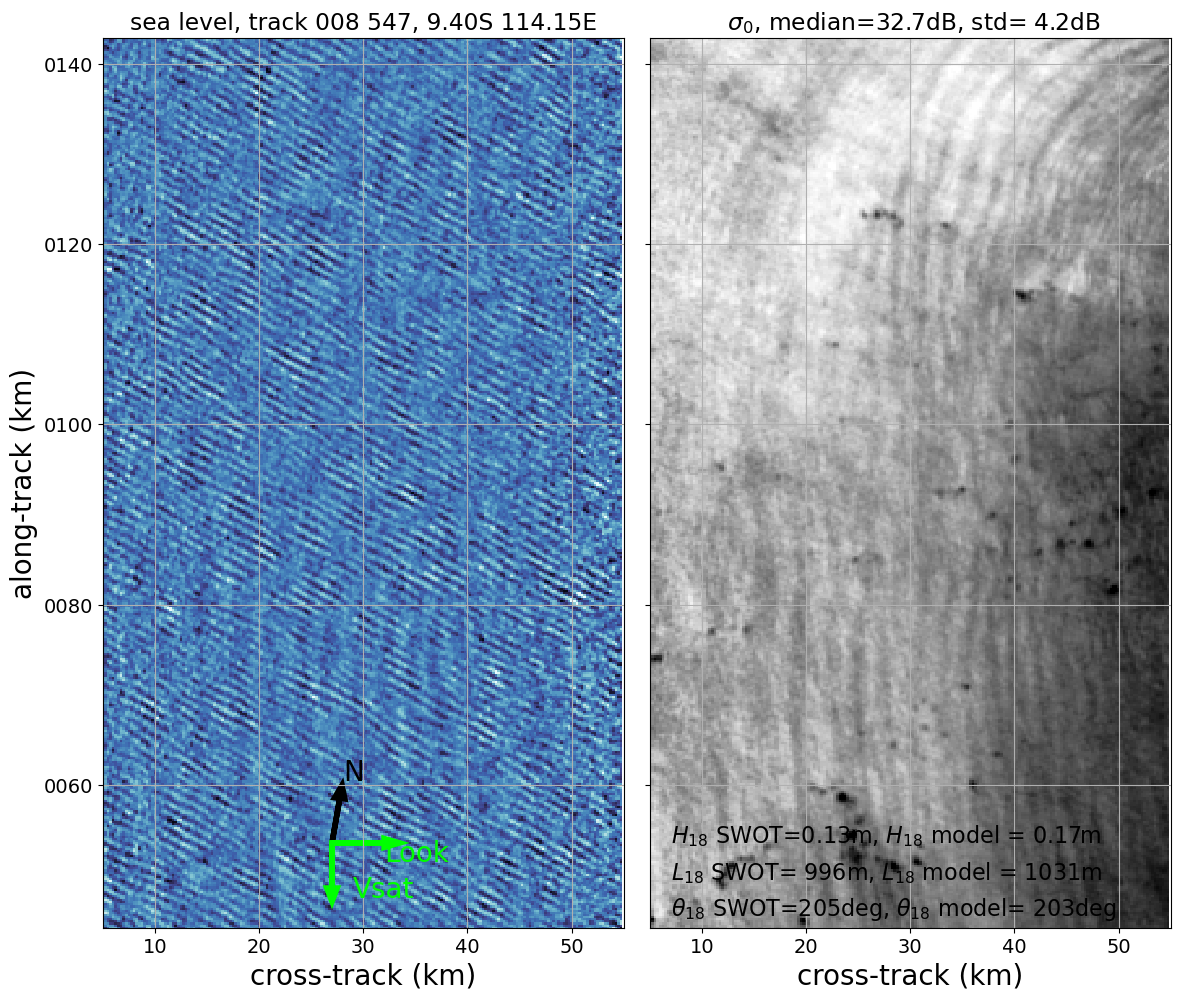

In [5]:
hemiNS=['A','N','S']
hemiWE=['A','E','W']
modelOK=1
dBE=0
fs1=20

pth_swot='/media/ardhuin/FabLinux/SWOT2/'
pth_results='ANIMATION/';calibration=1.2

cohthr=0.3
fs1=20; # font size
fshrink=0.8;

nm=0;mm=0;
marginlat=5
skipstep=4
savefile='png'
addarrows=1;
flagssha=2;
lonshift=0;


# simple test used for storing notebook on github 
cycle='547';days='20230609';tracks='008';dBE=10;dBE2=10;side='left';n=8;m=8; latmax=-9.0; latmin=-9.4; ddlat=-0.05;mask_choice=0;cmapmin=3;cmapmax=3;

# Movie S1
#cycle='547';days='20230609';tracks='008';dBE=10;dBE2=10;side='left';n=8;m=8; latmax=-9.0; latmin=-20; ddlat=-0.05;mask_choice=0;cmapmin=3;cmapmax=3;

# Movie S2
#cycle='547';days='20230609';tracks='008';dBE=10;dBE2=10;side='right';n=8;m=8; latmax=-9.0; latmin=-20; ddlat=-0.05;mask_choice=0;cmapmin=3;cmapmax=3;

# Movie S4
#flagssha=1E10;cycle='547';days='20230610';side='left';tracks='021';dBE=0;dBE2=10;FOUT='ANIMATIONS';n=8;m=8; latmax=-30; latmin=-64; ddlat=0.05;mask_choice=1;cmapmin=3;cmapmax=3;

#days='20230611';tracks='017';latc=-40;dBE=15;dBE2=15; side='left';n=8;m=8;latmax=-13; latmin=-40; ddlat=0.05;mask_choice=2;mask_choice2=2;cmapmin=20;cmapmax=3;
#days='20230612';tracks='017';latc=-40;dBE=15;dBE2=20;n=8;m=8; latmax=10; latmin=-40; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;

# Fig. S2.a 
#cycle='556';days='20230618';tracks='015';latc=49.9;side='right';n=8;m=8;dBE=0;dBE2=10;mask_choice=-4;n=8;m=8;latmin=35;latmax=59.8;ddlat=0.2;skipstep=1; cmapmin=3;cmapmax=10;lonshift=1;  

# Fig. S4 
#pth_results='LOOP3/';cycle='547';days='20230609';tracks='008';dBE=10;dBE2=10;side='left';nm=8;mm=8;n=4;m=4; latmax=-9.0; latmin=-20; ddlat=-0.05;mas_choice=0;cmapmin=3;cmapmax=3;
#pth_results='LOOP2/';cycle='547';days='20230609';tracks='008';dBE=10;dBE2=10;side='left';nm=4;mm=4;n=4;m=4; latmax=-9.0; latmin=-20; ddlat=-0.05;mask_choice=0;cmapmin=3;cmapmax=3;

#Fig S7.a 
#cycle='548';days='20230610';tracks='017';dBE=15;dBE2=20;n=8;m=8; latmax=-10;latmin=-55; skipstep=1; ddlat=0.2;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;
#Fig S7.b 
#cycle='550';tracks='017';side='left';lonshift=0;dBE=15;dBE2=20;n=8;m=8; latmax=0;latmin=-32;marginlat=5; ddlat=0.05;mask_choice=-3;cmapmin=20;cmapmax=3;

# Used for poster ... 
#addarrows=0;cycle='549';days='20230611';side='right';tracks='004';dBE=15;dBE2=20;n=2;m=2;nm=8;mm=8; latmax=-27;latmin=-30; ddlat=0.5;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;skipstep=1;savefile='pdf'; # was used for poster 

# tracks with buoy data 
#cycle='545';days='20230607';tracks='010';dBE=10;dBE2=10;side='left';n=8;m=8; latmax=-30.0; latmin=-45; ddlat=-0.05;mask_choice=0;cmapmin=3;cmapmax=3;skipstep=1
#cycle='546';days='20230608';tracks='010';dBE=10;dBE2=10;side='left';n=8;m=8; latmax=-30.0; latmin=-45; ddlat=-0.05;mask_choice=0;cmapmin=3;cmapmax=3;skipstep=1
# This one is really messy 
#cycle='546';days='20230609';side='left';tracks='021';dBE=0;dBE2=10;n=8;m=8; latmax=-34; latmin=-50; ddlat=0.05;mask_choice=1;cmapmin=3;cmapmax=3;skipstep=1;


#days='20230611';tracks='004';side='right';latc=-40;dBE=15;dBE2=15;FOUT='ANIMATIONS';n=8;m=8;latmax=-15; latmin=-35; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;
#days='20230611';tracks='004';side='left';latc=-40;dBE=15;dBE2=15;FOUT='ANIMATIONS';n=8;m=8;latmax=-15; latmin=-35; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;
#days='20230608';tracks='010';side='right';latc=-40;dBE=15;dBE2=20;FOUT='ANIMATIONS';n=8;m=8;latmax=0; latmin=-45; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=15;cmapmax=15;
#days='20230608';tracks='010';side='right';latc=-40;dBE=15;dBE2=20;FOUT='ANIMATIONS';n=8;m=8;latmax=-40; latmin=-45; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=15;cmapmax=15;

#days='20230612';tracks='028';side='left';dBE=0;dBE2=15;n=8;m=8;latmax=-15; latmin=-30; ddlat=0.05;mask_choice=-1;mask_choice2=0;cmapmin=20;cmapmax=3;

#cycle='548';days='20230610';tracks='008';td='descending';latc=-9.1;dBE=20;dBE2=30;side='left';n=8;m=8; latmax=-9.0; latmin=-20; ddlat=-0.05;mask_choice=0
#days='20230617';tracks='013';side='left';dBE=0;dBE2=15;n=8;m=8;latmax=41; latmin=30; ddlat=0.05;mask_choice=-1;mask_choice2=0;cmapmin=20;cmapmax=3;

#cycle='543';side='right';tracks='021';dBE=15;dBE2=20;n=8;m=8;nm=8;mm=8; latmax=-43;latmin=-63; ddlat=0.05;mask_choice=1;mask_choice2=0;cmapmin=20;cmapmax=3;
#cycle='545';side='right';tracks='010';dBE=15;dBE2=20;n=8;m=8;nm=8;mm=8; latmax=-43;latmin=-63; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;
#flagssha=1E10;cycle='543';side='left';tracks='023';dBE=15;dBE2=20;n=8;m=8;nm=8;mm=8; latmax=-55;latmin=-66; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;
#flagssha=1E10;cycle='544';side='left';tracks='021';dBE=15;dBE2=20;n=8;m=8;nm=8;mm=8; latmax=-55;latmin=-66; ddlat=0.05;mask_choice=0;mask_choice2=0;cmapmin=20;cmapmax=3;


ntrack=int(tracks)
if (np.mod(ntrack,2)==1):
    td='ascending'
else: 
    td='descending'
    
cfac=np.sqrt(n*m)

file_list = glob.glob(pth_swot+'SWOT_L2_LR_SSH_*_'+cycle+'_'+tracks+'*.nc')
file_swot=file_list[0]
tags=file_swot.split(sep='/')
filenopath=tags[-1]

days=file_swot[len(file_swot)-42:len(file_swot)-42+11]
print('Reading file:',file_swot,'##',days)

# Uses Globcurrent map for orientation ... 
ddla = xr.open_dataset(file_swot, group=side)
print(ddla)
xt=ddla.longitude[:,20].values
yt=ddla.latitude[:,20].values
ind=np.where((yt > latmin-marginlat) & (yt < latmax+5))[0]
print('TEST:',ind[0],ind[-1],yt[ind[0]],yt[ind[-1]],xt[ind[0]],xt[ind[-1]])
xt=xt[ind[0]:ind[-1]:10];yt=yt[ind[0]:ind[-1]:10]

# Get globcurrent 
ds = xr.open_dataset('../dataset-uv-nrt-hourly_20230609T0000Z_P20230726T0000.nc')
area=[np.floor( np.nanmin([xt]) )-cmapmin,np.floor(latmin)-marginlat,  np.ceil(np.nanmax([xt]) )+cmapmax,   np.ceil(latmax)+5]
print('YT:',area)
print('globlon:',ds.longitude[0],ds.longitude[-1], area[0], area[2])



selection = (
(ds.longitude+360*lonshift > area[0]) &
(ds.longitude+360*lonshift < area[2]) &
(ds.latitude > area[1]) &
(ds.latitude < area[3]))

ds_glob = ds.where(selection, drop=True)
globlon=ds_glob.longitude+360*lonshift
globlat=ds_glob.latitude
U=ds_glob.uo[17,0,:,:].squeeze()
V=ds_glob.vo[17,0,:,:].squeeze()

#fig,axs=plt.subplots(1,2,figsize=(18,10))#,sharey=True,sharex=True)
#fig.savefig('blank.png',dpi=100)

step=-1
l1=latmin;l2=latmax
if ddlat < 0:
    l1=latmax;l2=latmin
for latc in np.arange(l1,l2,ddlat): 
  step=step+1
  lat_bounds=[-0.5+float(latc), 0.5+float(latc)];
  lonlat=f'{abs(latc):05.2f}'+hemiNS[int(np.sign(latc))]
  filetag='SWOT_'+cycle+'_'+tracks+'_'+side+'_'+days+'_'+lonlat  

  print('group:',side,', lonlat:',lonlat)
  ddl,indsub0,indsub1=swot.subset(ddla,lat_bounds)
  print('latc:',latc,l1,l2,step,indsub0) 
  if step==0:
     shifty=indsub0
# Preprocess data
  ssha = ddl.ssh_karin_2
  flag = ddl.ssh_karin_2_qual
  ssha = np.where(flag < flagssha, ssha, np.nan)
  sig0 = ddl.sig0_karin_2
  flas = ddl.sig0_karin_2_qual
  #sig0 = np.where(flas == 0, sig0, np.nan)
  lon = ddl.longitude.values
  lat = ddl.latitude.values
  [nline,npix]=np.shape(ssha)
  print('number of lines (alongtrack):',nline,', number of pixels (crosstrack):',npix)
  dlon=lon[npix-10,10]-lon[10,10]
  dlat=lat[npix-10,10]-lat[10,10]
  midlat=0.5*(lat[npix-10,10]+lat[10,10])
  trackangle=-90-np.arctan2(dlat,dlon*np.cos(midlat*np.pi/180))*180/np.pi


  dx=250
  dy=235
  X=np.arange(npix)*dx/1000
  Y=(np.arange(nline)+indsub0-shifty)*dy/1000 # warning the along-track resolutionis not exactly 250 m
  I1=20;I2=220;J1=0;J2=420;
    
  # Defines area for spectral analysis 
  nX2=80 #40 #40 #80 # 20 # 40
  nY2=84 #42 #42 #84 #42

  #8 #4  # number of tiles along-track
  #8 #2  # number of tiles cross-track
  nxtile=nX2*2//m  # cross-track
  nytile=nY2*2//n  # along-track
  fshrink=0.8

# cross-track indices
  i1=28
  i2=i1+nX2*2
#alongtrack indices
  j1=nline//2-nY2 #10   # centers box on target latitude
  j2=j1+nY2*2
    
  
  mybox,mybos,flbox,X,Y,sflip,signMTF,Look=swell.SWOTarray_flip_north_up(dlat,side,ssha[j1:j2,i1:i2],flas[j1:j2,i1:i2],sig0[j1:j2,i1:i2],X,Y)
  SSHA,SIG0,FLAS,X,Y,sflip,signMTF,Look=swell.SWOTarray_flip_north_up(dlat,side,ssha[J1:J2,I1:I2],flas[J1:J2,I1:I2],sig0[J1:J2,I1:I2],X,Y)
  
  latcr=np.round(latc*2)/2; latcs=f'{abs(latc):3.2f}'+hemiNS[int(np.sign(latc))]
  lonc=lon[j1+nY2,i1+nX2]; loncr=np.round(lonc*2)/2; loncs=f'{abs(lonc):3.2f}'+hemiWE[int(np.sign(lonc))]
  timec=ddl.time.values[j1+nY2]

    

  if np.mod(step,skipstep)==0:
    
                
    print('track vector:',indsub0+j1,dlat,dlon*np.cos(midlat*np.pi/180),trackangle,trackangle+180,'##',dlat,Look,indsub0)
     
    mybox = np.where(np.isnan(mybox), 0,mybox)  
# Computes spectrum from SWOT SSH data
    print('nxtile:',nxtile,nytile,dx,dy)
    (Eta,Etb,ang,angstd,coh,crosr,phases,ky2,kx2,dky,dkx,detrenda,detrendb,nspec)=FFT2D_two_arrays_nm_detrend_flag(mybox,10**(0.1*mybos),flbox,dy,dx,n,m,detrend='quadratic') #,ffill='none')


    kxmax=-2*kx2[0,0]
    kymax=-2*ky2[0,0]
    nkxr=nxtile      # twice the SWOT range to allow aliasing computation 
    nkyr=nytile
    dkxr=kxmax/nkxr
    dkyr=kymax/(nkyr-1)  # only true in nkyr is odd ?? 
    dkxf=dkx/3;dkyf=dky/3;nkx=600;nky=600; #0.0001;dkyf=0.0001;nkx=500;nky=500
    nxavg=round(dkxr/dkxf)
    nyavg=round(dkyr/dkyf)
    kxr=np.linspace(-nkxr*dkxr,(nkxr-1)*dkxr,nkxr*2)
    kyr=np.linspace(-nkyr*dkyr,(nkyr-1)*dkyr,nkyr*2)
    fx_wreg=kxr*1000
    fy_wreg=kyr*1000
    kxr2, kyr2 = np.meshgrid(kxr,kyr,indexing='ij') 
    kn=np.sqrt(kx2**2+ky2**2)*1000

    ik1=(nxtile+1)//2;ik2=ik1+nxtile
    jk1=(nytile+1)//2;jk2=jk1+nytile
    ishift=(1-np.mod(nxtile,2))
    jshift=(1-np.mod(nytile,2))
    ix1=int(nkx-kxmax/dkxf)+nxavg*(ishift-1)
    iy1=int(nky-kymax/dkyf)+nyavg*(jshift-1)
    di1=-(nxavg//2); di2=di1+nxavg
    dj1=-(nyavg//2); dj2=dj1+nyavg

    
# Defines the spectral response H assocaited to SWOT on board processing
    from  lib_filters_obp import *
    x_xt, w_xt, f_xt, H_xt = get_obp_filter(L_filt = 0.980, f_axis = fx_wreg, plot_flag = False, kernel="parzen")
    x_at, w_at, f_at, H_at = get_obp_filter(L_filt = 1, f_axis = fy_wreg, plot_flag = False, kernel="bharris")
    #x_at, w_at, f_obp, H_ptr = get_obp_filter(L_filt = 3, sampling_in = 0.0125,f_axis = fy_wreg, plot_flag = False, kernel="sinc2")
    x_at, w_at, f_obp, H_ptr = get_obp_filter(L_filt = 3, sampling_in = 0.0125,f_axis = fy_wreg, plot_flag = False, kernel="alejandro_azptr")
    #x_at, w_at, f_at, H_ptr = get_obp_filter(L_filt = 1.23, f_axis = fy_wreg, plot_flag = False, kernel="bharris")
    
    H = np.repeat(np.array([H_xt]), len(H_at), axis=0).T * np.repeat(np.array([H_at]), len(H_xt), axis=0)
    Hptr = np.repeat(np.array([H_ptr]), len(H_xt), axis=0)

# Looks for matching WW3 spectrum 
    modelfound=0
    if (modelOK > 0):
        modspec,indww3,modelfound,timeww3,lonww3,latww3,distww3,U10,Udir=swell.SWOTfind_model_spectrum(ds_ww3t,lonc,latc,timec)

# Computes kx,ky spectrum from WW3 on fine grid: using even number of k's makes the spectrum non-symmetric 
        if (modelfound>0):
          efth=modspec.values;
          [Ef,th1m,sth1m,Hs,Tm0m1,Tm02,Qf,Qkk] = wavespec_Efth_to_first3(efth,modf,moddf, modang.values,moddth) 
          source='model';[Ekxky,kxm,kym,kx2m,ky2m]=wavespec_Efth_to_Ekxky(efth,modf,moddf, modang,moddth,dkx=dkxf,dky=dkyf,nkx=nkx,nky=nky,doublesided=0,verbose=1,trackangle=(trackangle+sflip*180)*np.pi/180)
        #print('di1:',nxavg,nyavg,nxavg//2,'##',di1,di2,dj1,dj2,ik1,kxr[ik1],np.mean(kxm[ix1+ik1*nxavg+di1:ix1+ik1*nxavg+di2]),kyr[jk1],np.mean(kym[iy1+jk1*nxavg+dj1:iy1+jk1*nxavg+dj2]))
    
# Coarsening of WW3 spectrum on kx,ky grid 
          Ekxkyr=np.zeros((nkxr*2,nkyr*2))
        # We have to deal with the non-symmetry of the spectrum : hence the np.roll 
          Ekxkyds=0.5*(Ekxky+np.fliplr(np.roll( np.flipud(np.roll(Ekxky,-1,axis=0)),-1,axis=1) ))

# Coarsening of WW3 spectrum on kx,ky grid 
        # We have to deal with the non-symmetry of the spectrum for even numbers (nxtile or nytile) 
          for ix in range(nkxr*2): 
            for iy in range(nkyr*2): 
                Ekxkyr[ix,iy]=np.mean(Ekxkyds[ix1+ix*nxavg+di1:ix1+ix*nxavg+di2,iy1+iy*nyavg+dj1:iy1+iy*nyavg+dj2].flatten())


          Eta_WW3=Ekxkyr   # this is the WW3 spectrum on SWOT grid + double-sided
# computes azimuthal cut-off wavenumber and filter ... 
          sigu=(Hs/4)*2*np.pi/Tm02
          kc=(7310/875.0e3)/sigu/(2*np.pi)   # az cut-off wavenumber in cpk 
          Hazc = np.exp(-(kyr2/kc)**2)        # this is the effect of velocity bunching for sigma0 ... what about the phase? 
          H2=H*Hptr*Hazc
          print('Az cut-off:',sigu,1/kc,Hazc[0,0],Hptr[0,0],Hazc[0,10],Hptr[0,10],np.shape(Hazc))
        
# Until we fix the issue of the filter, computes the OBP-equivalent model spectrum with both H and H^2
          Sw_obp_H  = H  * Hazc * Eta_WW3
          Sw_obp_H2 = H2 * Eta_WW3
# 4) Downsample in space to the target spatial frequency
          fx_alias, fy_alias, Sw_alias_H = compute_aliased_spectrum_2D(f_xt, f_at, Sw_obp_H, 1/0.250, 1/0.235, nrep=1)
          fx_alias, fy_alias, Sw_alias_H2 = compute_aliased_spectrum_2D(f_xt, f_at, Sw_obp_H2, 1/0.250, 1/0.235, nrep=1)
    
    
# 3) Apply filter
          vars=np.sum(Ekxkyr.flatten())*dkxr*dkyr
          print('sum of coarsened model spectrum at ',lonww3,latww3,' :',vars,4*np.sqrt(vars),'max med:',np.nanmax(mybos),np.nanmedian(mybos) )

    
##################################################################################
    if (modelfound > 0):
        Eta_WW3_c=Ekxkyr[ik1:ik2,jk1:jk2].T  # this is the WW3 spectrum*OBP filter with alias effect 
        Eta_WW3_ob1_H=Sw_obp_H[ik1:ik2,jk1:jk2].T
        Eta_WW3_obp_H=Sw_alias_H[ik1:ik2,jk1:jk2].T
        Eta_WW3_ob1_H2=Sw_obp_H2[ik1:ik2,jk1:jk2].T
        Eta_WW3_obp_H2=Sw_alias_H2[ik1:ik2,jk1:jk2].T
# Also computes the spectrum without aliasing to check on filter + aliasing effects 
        Eta_WW3_noa_H2=Sw_obp_H2[ik1:ik2,jk1:jk2].T

    # Defines swell mask  : uses function SWOTdefine_swell_mask
    HH =H[ik1:ik2,jk1:jk2].T
    HH2=H2[ik1:ik2,jk1:jk2].T
    
    spec_for_mask=Eta/HH2
    if mask_choice == -3 :
       spec_for_mask=Eta_WW3_noa_H2/HH2
    if mask_choice == -4 :
       spec_for_mask=Eta_WW3_noa_H2
    amask,bmask=swell.SWOTdefine_swell_mask(mybox,mybos,flbox,dy,dx,nm,mm,spec_for_mask,coh,ang,dlat,mask_choice,kx2,ky2,kn,cohthr,cfac,n,m,nkxr,nkyr)

    vertices=swell.SWOTspec_mask_polygon(Eta,amask) 


    
                
# Computes model parameters ... 
    if (modelfound > 0):
        
        Eta_mask=np.where( bmask > 0.5, Eta_WW3_c,0) 
        varmask=np.sum(Eta_mask.flatten())*dkxr*dkyr;
        Hs_WW3_mask=4*np.sqrt(varmask)

        Eta_WW3_obp_mask=np.where( bmask > 0.5, Eta_WW3_obp_H2,0) 
        Eta_WW3_obp_H2_mask=np.where( bmask > 0.5, Eta_WW3_obp_H2,0) 

        var1=np.sum(Eta_WW3_obp_mask.flatten())*dkxr*dkyr*2;
        var2=np.sum(Eta_WW3_obp_H2.flatten())*dkxr*dkyr;
        var3=np.sum(Eta_WW3_c.flatten())*dkxr*dkyr;
        Hs_WW3=4*np.sqrt(var1)
        Hs_WW3_all=4*np.sqrt(var2)
        Hs_WW3_cut=4*np.sqrt(var3)
        Hs_WW3_mask,Lm_WW3,Lmnew,dm_WW3=swell.SWOTspec_to_HsLm(Eta_WW3_obp_H2,kx2,ky2,bmask,HH2,trackangle)

        #cosm_SWOT=np.mean(np.multiply(kx2,Eta_WW3_obp_H2_mask).flatten())
        #sinm_SWOT=np.mean(np.multiply(ky2,Eta_WW3_obp_H2_mask).flatten())
        #dm_WW3=np.mod(90-(-shiftdir+np.arctan2(sinm_SWOT,cosm_SWOT)*180/np.pi),360)

####################################################################################
    # Plotting coarsened WW3 spectrum, same resolution as SWOT spectrum but 2 x spectral range
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6,3.5))
    spec = mpl.gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[6, 5])
    plt.subplots_adjust(left=0.05,bottom=0.1, top=0.92,wspace=0.1,right=0.99)
  
    
    im=ax[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10(Eta_WW3_obp_H2),cmap='viridis',rasterized=True,vmin = -10+dBE, vmax=30+dBE)
    _=ax[0].set_title('model spectrum  (dB)')
    for ind in range(len(vertices) // 4):
          xy2=np.asfarray(vertices[ind*4:(ind+1)*4])
          ax[0].plot(kxr[ik1]*1000+1000*dkx*xy2[0:2],kyr[jk1]*1000+1000*dky*xy2[2:4], color='w',lw=3)

    #im=ax[1].pcolormesh(-kxm[ix1:ix1+nxtile*6]*1000,-kym[iy1:iy1+nxtile*6]*1000,10*np.log10(Ekxky[ix1:ix1+nxtile*6,iy1:iy1+nxtile*6]*np.exp(-(ky2m[ix1:ix1+nxtile*6,iy1:iy1+nxtile*6]/kc)**2)).T,cmap='viridis',rasterized=True,vmin=-10+dBE2, vmax=30+dBE2)
    im=ax[1].pcolormesh(-kxm[ix1:ix1+nxtile*6]*1000,-kym[iy1:iy1+nxtile*6]*1000,10*np.log10(Ekxky[ix1:ix1+nxtile*6,iy1:iy1+nxtile*6]).T,cmap='viridis',rasterized=True,vmin=-10+dBE2, vmax=30+dBE2)
    #_=plt.colorbar(im,ax=ax[1],label='', location='bottom',shrink=fshrink)
    _=ax[1].set_title('model unfiltered')
    plt.setp(ax[1].get_yticklabels(), visible=False)
    #ax[1].axis('equal')
    plt.show()
    fig.savefig(pth_results+filetag+'WW3.png',dpi=100)    

    Eta_SWOT_mask=np.where( amask > 0.5, Eta,0) 
    
    varm=np.sum(Eta.flatten())*dkx*dky;
    var0=np.sum(Eta_SWOT_mask.flatten())*dkx*dky*2;
    Hs_SWOT_all=4*np.sqrt(varm)
    Hs_SWOT=4*np.sqrt(var0)
    Hs_SWOT_mask,Lm_SWOT,Lmnew,dm_SWOT=swell.SWOTspec_to_HsLm(Eta,kx2,ky2,amask,HH2,trackangle)
  
########################### Plots SWOT spectrum E_S(kx,ky)
    fig,axs= plt.subplots(nrows=1, ncols=2,figsize=(6,3.5))
    spec = mpl.gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[6, 5])
    plt.subplots_adjust(left=0.05,bottom=0.10, top=0.92,wspace=0.1,right=0.99)
    im=axs[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10((Eta)),norm = mcolors.Normalize(vmin=-10+dBE, vmax=30+dBE),rasterized=True)
    _=axs[0].set_title('SWOT spectrum' )
#
#    for ind in range(len(vertices) // 4):
#         xy2=np.asfarray(vertices[ind*4:(ind+1)*4])
#         axs[0].plot(kx2[0,0]*1000+1000*dkx*xy2[0:2],ky2[0,0]*1000+1000*dky*xy2[2:4], color='w',lw=3)
    
    if (td =='descending'):
        ind=np.where(yt >= latc)[0]
    else:
        ind=np.where(yt <= latc)[0]
    im=axs[1].pcolormesh(globlon,globlat,np.sqrt(U**2+V**2), cmap=lightcmap,rasterized=True,shading='nearest',vmin = 0, vmax =1)
    _=axs[1].set_title('Globcurrent map' )
    plt.setp(axs[1].get_yticklabels(), visible=False)
    axs[1].scatter(xt[ind],yt[ind],c='r',marker='+',s=30,linewidth=2)
    
  
    fig.savefig(pth_results+filetag+'spec.png',dpi=100)    

###############
    fig,axs=plt.subplots(1,2,figsize=(6,3))#,sharey=True,sharex=True)
    spec = mpl.gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[5, 4])
    plt.subplots_adjust(left=0.05,bottom=0.1, top=0.92,wspace=0.1,right=0.99)

    im=axs[0].pcolormesh(kx2*1000,ky2*1000,coh,cmap='viridis',rasterized=True,vmin = 0., vmax =1)
    for ind in range(len(vertices) // 4):
         xy2=np.asfarray(vertices[ind*4:(ind+1)*4])
         axs[0].plot(kx2[0,0]*1000+1000*dkx*xy2[0:2],ky2[0,0]*1000+1000*dky*xy2[2:4], color='w',lw=3)
    _=axs[0].set_title('coherence')
      
    im=axs[1].pcolormesh(kx2*1000,ky2*1000,np.degrees(ang),cmap='seismic',rasterized=True,norm = mcolors.Normalize(vmin=-180, vmax=180))
    _=axs[1].set_title('phase' )
    for ind in range(len(vertices) // 4):
         xy2=np.asfarray(vertices[ind*4:(ind+1)*4])
         axs[1].plot(kx2[0,0]*1000+1000*dkx*xy2[0:2],ky2[0,0]*1000+1000*dky*xy2[2:4], color='k',lw=3)
    plt.setp(axs[1].get_yticklabels(), visible=False)
    fig.savefig(pth_results+filetag+'coh.png',dpi=100)    
        
    #########" Summary diagnostics 
    Xbox=X[i1:i2];Ybox=Y[j1:j2]
        
    #Xbox=Xbox,Ybox=Ybox,sshbox_detrend=detrenda,sig0box=mybos,\
    boxindices=[indsub0+j1,indsub0+j2,i1,i2]
    sig0mean=np.nanmedian(mybos)
    sig0std=np.nanstd(mybos)
    
    if (modelfound > 0):
       swell.SWOT_save_spectra(pth_results,filenopath,modelfound,cycle,tracks,side,boxindices,\
                       lonc,latc,timec,trackangle,kx2,ky2,Eta,Etb,coh,ang,amask,sig0mean,sig0std,HH,HH2,Hs_SWOT_all,Hs_SWOT,Hs_SWOT_mask,Lm_SWOT,dm_SWOT, \
                       timeww3=timeww3,lonww3=lonww3,latww3=latww3,indww3=indww3,distww3=distww3, \
                       E_WW3_obp_H=Eta_WW3_obp_H,E_WW3_obp_H2=Eta_WW3_obp_H2,E_WW3_noa_H2=Eta_WW3_noa_H2,Hs_WW3=Hs_WW3,Hs_WW3_all=Hs_WW3_all,Hs_WW3_cut=Hs_WW3_cut,\
                       Hs_WW3_mask=Hs_WW3_mask,Hs=Hs,Tm0m1=Tm0m1,Tm02=Tm02,U10=U10,Udir=Udir,Qkk=Qkk,Lm_WW3=Lm_WW3,dm_WW3=dm_WW3, verbose=0)
    else:
        swell.SWOT_save_spectra(pth_results,filenopath,modelfound,cycle,tracks,side,boxindices,\
                       lonc,latc,timec,trackangle,kx2,ky2,Eta,Etb,coh,ang,amask,sig0mean,sig0std,HH,HH2,Hs_SWOT_all,Hs_SWOT,Hs_SWOT_mask,Lm_SWOT,dm_SWOT)

  (Eta,Etb,ang,angstd,coh,crosr,phases,ky2,kx2,dky,dkx,detrenda,detrendb,nspec)=FFT2D_two_arrays_nm_detrend_flag(SSHA,10**(0.1*SIG0),FLAS,dy,dx,10,5,detrend='quadratic') #,ffill='none')
   
    # Plots the long (1° latitude ) segment 
    #fig, ax = plt.subplots(figsize=(18, 20),ncols=2,nrows=1,sharex=True,sharey=True,subplot_kw=dict(projection=ccrs.PlateCarree()))
    # ssh
    #swot.plot_a_segment(ax[0], lon[j1:j2,i1:i2], lat[j1:j2,i1:i2], detrenda, title='SSHA_KaRIn_2 original',vmin=-0.1,vmax=0.1)
    # Plot sig0
  sig0max=np.nanmax(sig0)
  sig0min=np.nanmin(sig0)
  sig0mean=np.nanmedian(sig0)
  sig0std=np.nanstd(sig0)
  #swot.plot_a_segment(ax[1], lon[j1:j2,i1:i2], lat[j1:j2,i1:i2], sig0[j1:j2,i1:i2], title='sig0 '+tracks+' '+days,vmin=0,vmax=sig0max,cblab='dB')
  YP=Y #-Y[J1]
  fig,axs=plt.subplots(1,2,figsize=(12,10))#,sharey=True,sharex=True)
  plt.subplots_adjust(left=0.1,bottom=0.07, top=0.96,wspace=0.05,right=0.99)
 
  if Look==-1:
        axs=np.roll(axs,1)
        plt.setp(axs[0].get_yticklabels(), visible=False)
        _=axs[1].set_ylabel('along-track (km)',fontsize=fs1)
  else:
        plt.setp(axs[1].get_yticklabels(), visible=False)
        _=axs[0].set_ylabel('along-track (km)',fontsize=fs1)
  

  im=axs[0].pcolormesh(X[I1:I2],YP[J1:J2],detrenda,rasterized=True, cmap=lightcmap,vmin=-0.1,vmax=0.1)
  
  arx0=X[(i1+i2)//2];ary0=YP[40];arxd=5;aryd=5;arwid=1;gr=[0.,1,0.]
  if addarrows==1:
    axs[0].arrow(arx0, ary0, arxd*np.sign(dlat)*np.sin(trackangle*np.pi/180), -np.sign(dlat)*aryd*np.cos(trackangle*np.pi/180), linewidth=4,color='k',head_width=arwid) 
    axs[0].text(arx0+arxd*1.4*np.sign(dlat)*np.sin(trackangle*np.pi/180),ary0-np.sign(dlat)*aryd*1.4*np.cos(trackangle*np.pi/180),'N',fontsize=fs1)
    axs[0].arrow(arx0, ary0, 0., 5*np.sign(dlat), linewidth=4,color=gr,head_width=arwid) 
    axs[0].text(arx0+0.4*arxd,ary0+aryd*1.2*np.sign(dlat),'Vsat',fontsize=fs1,color=gr)
    axs[0].arrow(arx0, ary0 ,  arxd*Look, 0, linewidth=4,color=gr,head_width=arwid) 
    axs[0].text(arx0+arxd*(1.5*Look-0.5),ary0-2,'Look',fontsize=fs1,color=gr)
    #axs[0].axis('equal')
        
  _=axs[0].set_xlabel('cross-track (km)', fontsize=fs1)
  _=axs[0].set_title('sea level, track '+tracks+' '+cycle+', '+latcs+' '+loncs)
  axs[0].set_xlim((X[I1],X[I2]))
  axs[0].set_ylim((YP[J1],YP[J2]))
  Yticks=axs[0].get_yticks()
  newlabs=[ f"{int(np.abs(value)):04d}" for value in Yticks ]
  axs[0].set_yticklabels(newlabs)
    
      
  im=axs[1].pcolormesh(X[I1:I2],YP[J1:J2],SIG0,cmap='Greys_r',rasterized=True,vmax=sig0mean+2.5*sig0std,vmin=sig0mean-2.5*sig0std)
  axs[1].set_xlim((X[I1],X[I2]))
  axs[1].set_ylim((YP[J1],YP[J2]))
  #_=plt.colorbar(im,ax=axs[1],label=r'$\sigma_0$ (dB)', location='right',shrink=fshrink)
  _=axs[1].set_xlabel('cross-track (km)', fontsize=fs1)
  #_=axs[1].set_ylabel('along-track (km)',fontsize=fs1)
  _=axs[1].set_title(r' $\sigma_0$, median='+f'{abs(sig0mean):4.1f}'+'dB, std='+f'{abs(sig0std):4.1f}'+'dB')
  #axs[1].axis('equal')
  axs[1].set_yticklabels(np.abs(Yticks).astype(str))
  if (step > skipstep):
     resultat1=r'$H_{18}$ SWOT='+f'{Hs_SWOT_mask:4.2f}'+'m, $H_{18}$ model = '+f'{Hs_WW3_mask:4.2f}'+'m'
     axs[1].text(arx0-4*arxd,ary0, resultat1,fontsize=16,color='k')
     resultat2=r'$L_{18}$ SWOT='+f'{Lm_SWOT:4.0f}'+'m, $L_{18}$ model = '+f'{Lm_WW3:4.0f}'+'m'
     axs[1].text(arx0-4*arxd,ary0-0.8*aryd, resultat2,fontsize=16,color='k')
     resultat3=r'$\theta_{18}$ SWOT='+f'{dm_SWOT:3.0f}'+r'deg, $\theta_{18}$ model= '+f'{dm_WW3:3.0f}'+'deg'
     axs[1].text(arx0-4*arxd,ary0-1.6*aryd, resultat3,fontsize=16,color='k')
#  print('Hs from SWOT :',Hs_SWOT, Hs_SWOT_all, Hs_SWOT_mask,' and WW3:',Hs_WW3,Hs_WW3_all,Hs_WW3_mask,'##',Hs_WW3_cut )
#  print('Lm,dm from SWOT:',Lm_SWOT,dm_SWOT,' and WW3:',Lm_WW3,dm_WW3,shiftdir,ncoh )


  if savefile=='pdf' :    
      fig.savefig(pth_results+filetag+'map.pdf') #',dpi=100)
  else :
      fig.savefig(pth_results+filetag+'map.png',dpi=100)
